# Tarea 9 - Análisis de Sentimientos con CNN y RNN

- Martínez Ostoa Néstor I.
- Minería de Textos
- LCD, IIMAS, UNAM
- 28 de abril del 2022

---

Utilizando el corpus Movie reviews (http://ai.stanford.edu/~amaas/data/sentiment/) que ya descargaste previamente, o importado desde Keras (https://keras.io/api/datasets/imdb/ )

Utilizar el clasificadores basados en redes neuronales para predecir las etiquetas de los documentos del dataset. Utilizar las siguientes arquitecturas:

- Redes convolucionales (CNN)

- Redes recurrentes (RNN)

Evaluar los resultados usando al menos 2 modelos (1 CNN y 1 RNN) y discutir los resultados obtenidos.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
import seaborn as sns

sns.set_theme(style='darkgrid')

## Carga de datos

In [34]:
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)
print(f"\nTraining samples: {len(X_train)}\nTest samples: {len(X_test)}")


Training samples: 25000
Test samples: 25000


In [35]:
word2id = imdb.get_word_index()
id2word = {i:word for word, i in word2id.items()}

print([id2word.get(i, ' ') for i in X_train[i]], end='\n\n')
print(y_train[i])

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 'they'

In [36]:
print(f"Número de palabras en el vocabulario: {len(word2id)}")

Número de palabras en el vocabulario: 88584


## RNN + LSTM

In [71]:
from keras.preprocessing import sequence
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, Activation

In [47]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [48]:
embedding_size=64

rnn_lstm = Sequential([
    Embedding(vocab_size, embedding_size, input_length=max_words),
    LSTM(100),
    Dense(1, activation='sigmoid')
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 64)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 386,101
Trainable params: 386,101
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
rnn_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [50]:
batch_size = 64
num_epochs = 20

history = rnn_lstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs = num_epochs,
    batch_size = batch_size,
    verbose=1
)

Epoch 1/20
391/391 [==============================] - 19s 43ms/step - loss: 0.4547 - accuracy: 0.7790 - val_loss: 0.3289 - val_accuracy: 0.8648
Epoch 2/20
391/391 [==============================] - 16s 40ms/step - loss: 0.2713 - accuracy: 0.8898 - val_loss: 0.2994 - val_accuracy: 0.8776
Epoch 3/20
391/391 [==============================] - 17s 43ms/step - loss: 0.2289 - accuracy: 0.9119 - val_loss: 0.3153 - val_accuracy: 0.8705
Epoch 4/20
391/391 [==============================] - 17s 42ms/step - loss: 0.2012 - accuracy: 0.9238 - val_loss: 0.3526 - val_accuracy: 0.8642
Epoch 5/20
391/391 [==============================] - 17s 43ms/step - loss: 0.1588 - accuracy: 0.9399 - val_loss: 0.3609 - val_accuracy: 0.8595
Epoch 6/20
391/391 [==============================] - 17s 42ms/step - loss: 0.1360 - accuracy: 0.9492 - val_loss: 0.3900 - val_accuracy: 0.8602
Epoch 7/20
391/391 [==============================] - 17s 44ms/step - loss: 0.1209 - accuracy: 0.9546 - val_loss: 0.4095 - val_accuracy:

In [54]:
rnn_lstm_test_loss, rnn_lstm_test_acc = rnn_lstm.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {rnn_lstm_test_acc*100}')
print(f'Test loss: {rnn_lstm_test_loss}')

Test accuracy: 85.32800078392029
Test loss: 0.8124446272850037


In [55]:
def plot_graphs(history, metric, title):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.title(title)
  plt.legend([metric, 'val_'+metric])

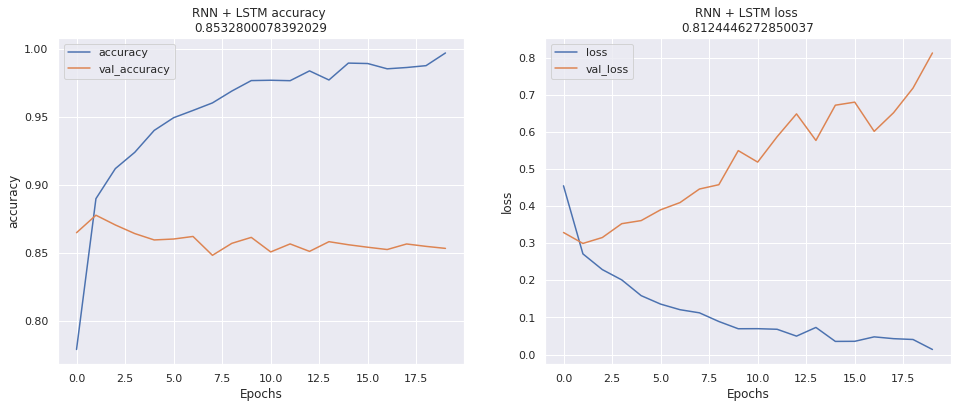

In [57]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy', f"RNN + LSTM accuracy \n{rnn_lstm_test_acc}")
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss', f"RNN + LSTM loss \n{rnn_lstm_test_loss}")

## RNN + Bidirectional

In [61]:
rnn_bidirectional = Sequential([
    Embedding(vocab_size, embedding_size, input_length=max_words),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])
85.32
print(rnn_bidirectional.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 128)          66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 431,489
Trainable params: 431,489
Non-trainable params: 0
________________________________________________

In [62]:
rnn_bidirectional.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [63]:
history_rnn_bidirectional = rnn_bidirectional.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs = num_epochs,
    batch_size = batch_size,
    verbose=1
)

Epoch 1/20
391/391 [==============================] - 52s 116ms/step - loss: 0.6791 - accuracy: 0.6666 - val_loss: 0.4998 - val_accuracy: 0.8006
Epoch 2/20
391/391 [==============================] - 43s 111ms/step - loss: 0.5455 - accuracy: 0.7906 - val_loss: 0.4822 - val_accuracy: 0.8092
Epoch 3/20
391/391 [==============================] - 45s 114ms/step - loss: 0.5184 - accuracy: 0.8004 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 4/20
391/391 [==============================] - 44s 113ms/step - loss: 0.6014 - accuracy: 0.6860 - val_loss: 0.5201 - val_accuracy: 0.7971
Epoch 5/20
391/391 [==============================] - 45s 114ms/step - loss: 0.4305 - accuracy: 0.8503 - val_loss: 0.4173 - val_accuracy: 0.8072
Epoch 6/20
391/391 [==============================] - 45s 116ms/step - loss: 0.5933 - accuracy: 0.6994 - val_loss: 0.5861 - val_accuracy: 0.7054
Epoch 7/20
391/391 [==============================] - 45s 115ms/step - loss: 0.6284 - accuracy: 0.6594 - val_loss: 0.5798 - val_ac

In [65]:
rnn_bi_test_loss, rnn_bi_test_acc = rnn_bidirectional.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {rnn_bi_test_acc*100}')
print(f'Test loss: {rnn_bi_test_loss}')

Test accuracy: 86.92399859428406
Test loss: 0.6927090883255005


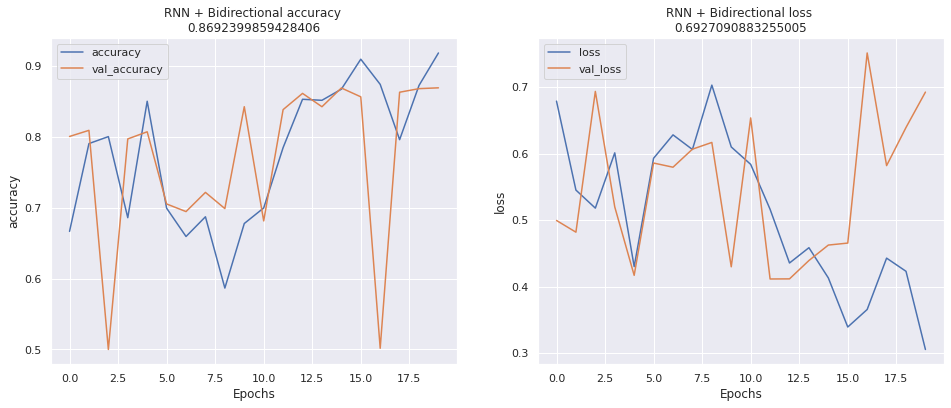

In [66]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history_rnn_bidirectional, 'accuracy', f"RNN + Bidirectional accuracy \n{rnn_bi_test_acc}")
plt.subplot(1, 2, 2)
plot_graphs(history_rnn_bidirectional, 'loss', f"RNN + Bidirectional loss \n{rnn_bi_test_loss}")

## CNN

In [72]:
filters = 250
kernel_size = 3
hidden_dims = 250

cnn = Sequential([
    Embedding(vocab_size, embedding_size, input_length=max_words),
    Dropout(0.2),
    Conv1D(filters,kernel_size,padding='valid', activation='relu', strides=1),
    GlobalMaxPooling1D(),
    Dense(hidden_dims),
    Dropout(0.2),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid')
])

print(cnn.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 500, 64)           320000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 498, 250)          48250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250)              

In [75]:
cnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_cnn = cnn.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epochs,
          validation_data=(X_test, y_test))

Epoch 1/20
391/391 [==============================] - 6s 12ms/step - loss: 0.2143 - accuracy: 0.9166 - val_loss: 0.2658 - val_accuracy: 0.8891
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 0.1536 - accuracy: 0.9439 - val_loss: 0.2900 - val_accuracy: 0.8862
Epoch 3/20
391/391 [==============================] - 5s 13ms/step - loss: 0.0997 - accuracy: 0.9664 - val_loss: 0.3187 - val_accuracy: 0.8858
Epoch 4/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0626 - accuracy: 0.9798 - val_loss: 0.3722 - val_accuracy: 0.8860
Epoch 5/20
391/391 [==============================] - 5s 14ms/step - loss: 0.0420 - accuracy: 0.9855 - val_loss: 0.4098 - val_accuracy: 0.8826
Epoch 6/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0319 - accuracy: 0.9882 - val_loss: 0.5490 - val_accuracy: 0.8689
Epoch 7/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0309 - accuracy: 0.9888 - val_loss: 0.5002 - val_accuracy: 0.8788

In [77]:
cnn_test_loss, cnn_test_acc = cnn.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {cnn_test_acc*100}')
print(f'Test loss: {cnn_test_loss}')

Test accuracy: 87.84400224685669
Test loss: 0.6869242787361145


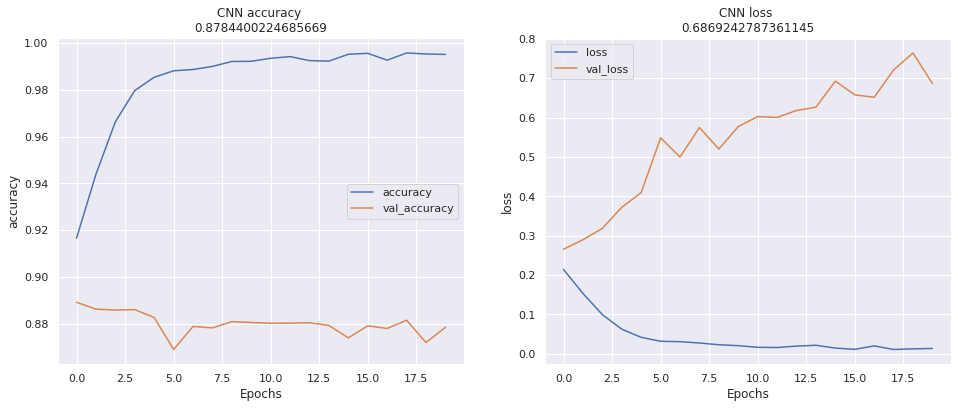

In [78]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history_cnn, 'accuracy', f"CNN accuracy \n{cnn_test_acc}")
plt.subplot(1, 2, 2)
plot_graphs(history_cnn, 'loss', f"CNN loss \n{cnn_test_loss}")

## Análisis de resultados


| Modelo | Exactitud | Pérdida |
| ------ | --------- | ------- |
| RNN + LSTM | 85.32 | 81.24 |
| RNN + Bidirectional | 86.92 | 69.27 |
| CNN | 87.84 | 68.69 |

- A pesar de que los tres modelos obtienen resultados muy similares en precisión, son los valores de pérdida los que más varían para una RNN con LSTM
- Lo que sorprende de los resultados es que el modelo de redes convolucionales (CNN) sea el mejor de los tres, esto debido a que las redes recurrentes (RNN) ocupando celdas LSTM o Bidireccionales, fueron diseñados para información secuencial (como texto) y deberían funcionar de mejor manera puesto que pasan información entre cada iteración haciendo uso del estado oculto $h_t$